INITIALIZE:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.interpolate as interpolate
import time

PARAMETERS/INITIAL ARRAYS:

In [4]:
t=1
tp=-0.400
tpp=0.000

k1=92
k2=92
Nexp=12
D=50

In [5]:
temparray=[0.0067050, 0.0076628, 0.0086207, 0.0095785, 0.0105364 , 0.0114943, 0.0124521, 0.0134100, 0.0143678, 0.0153257, 0.0162835, 0.0172414, 0.0181992, 0.0191571, 0.0201149, 0.0210728, 0.0220307, 0.0229885, 0.0239464, 0.0249042, 0.0258621, 0.0268199, 0.0277778, 0.0287356, 0.0296935, 0.0306513, 0.0316092, 0.0325670, 0.0335349, 0.0344828, 0.0354406, 0.0363985, 0.0373563, 0.0383142, 0.0402299, 0.0421456, 0.0440613, 0.0459770, 0.0478927, 0.0498084, 0.0517241, 0.0536398, 0.0555556, 0.0574713, 0.0593870, 0.0613027, 0.0632184, 0.0651341, 0.0670498, 0.0689655, 0.0708812, 0.0727969, 0.0747126, 0.0766284]
tempnames=[('%.4f' %temp) for temp in temparray];

In [6]:
sizev=2**Nexp 
sizee=k1*k2
sizek=k1

krange=np.linspace(0,2*np.pi-(2*np.pi/sizek),sizek)
vrange=np.linspace(-D,D-((2*D)/sizev),sizev) 

finalk1=np.zeros(k1*k2*(2**Nexp)).tolist()
finalk2=np.zeros(k1*k2*(2**Nexp)).tolist()
finalv=np.zeros(k1*k2*(2**Nexp)).tolist()
for i in range(sizek):            
    for j in range(sizek):
        for k in range(sizev):  
            m=k+sizev*(j+sizek*i)      
            finalk1[m]=krange[i]
            finalk2[m]=krange[j]
            finalv[m]=vrange[k]



IMPORTS:

In [8]:
lists = []
with open('680Bidata.txt', 'r') as f:
    contents = f.read().split('\n---\n') 
    for list_section in contents:
        if list_section.strip():
            array_list = []
            lines = list_section.splitlines()
            for line in lines:
                if not line.strip() or line.startswith("List") or line.startswith("Array"):
                    continue
                array_list.append(np.fromstring(line, sep=' ', dtype=float))
            lists.append(array_list)

coeffRHOSYM680Bi = [[arr[0:5] for arr in sublist] for sublist in lists]
coeffRHOASYM680Bi = [[arr[5:10] for arr in sublist] for sublist in lists]
coeffRESYM680Bi = [[arr[10:16] for arr in sublist] for sublist in lists]
coeffREASYM680Bi = [[arr[16:21] for arr in sublist] for sublist in lists]
y0RHO680Bi = [[arr[21:22] for arr in sublist] for sublist in lists]
y0RE680Bi = [[arr[22:23] for arr in sublist] for sublist in lists]
mu680Bi = [[arr[23:24] for arr in sublist] for sublist in lists]

del lists

In [9]:
lists = []
with open('710Bidata.txt', 'r') as f:
    contents = f.read().split('\n---\n')  
    for list_section in contents:
        if list_section.strip():  
            array_list = []
            lines = list_section.splitlines()
            for line in lines:
                if not line.strip() or line.startswith("List") or line.startswith("Array"):
                    continue
                array_list.append(np.fromstring(line, sep=' ', dtype=float))
            lists.append(array_list)

coeffRHOSYM710Bi = [[arr[0:5] for arr in sublist] for sublist in lists]
coeffRHOASYM710Bi = [[arr[5:10] for arr in sublist] for sublist in lists]
coeffRESYM710Bi = [[arr[10:16] for arr in sublist] for sublist in lists]
coeffREASYM710Bi = [[arr[16:21] for arr in sublist] for sublist in lists]
y0RHO710Bi = [[arr[21:22] for arr in sublist] for sublist in lists]
y0RE710Bi = [[arr[22:23] for arr in sublist] for sublist in lists]
mu710Bi = [[arr[23:24] for arr in sublist] for sublist in lists]

del lists

In [10]:
lists = []
with open('740Bidata.txt', 'r') as f:
    contents = f.read().split('\n---\n')  
    for list_section in contents:
        if list_section.strip():  
            array_list = []
            lines = list_section.splitlines()
            for line in lines:
                if not line.strip() or line.startswith("List") or line.startswith("Array"):
                    continue
                array_list.append(np.fromstring(line, sep=' ', dtype=float))
            lists.append(array_list)

coeffRHOSYM740Bi = [[arr[0:5] for arr in sublist] for sublist in lists]
coeffRHOASYM740Bi = [[arr[5:10] for arr in sublist] for sublist in lists]
coeffRESYM740Bi = [[arr[10:16] for arr in sublist] for sublist in lists]
coeffREASYM740Bi = [[arr[16:21] for arr in sublist] for sublist in lists]
y0RHO740Bi = [[arr[21:22] for arr in sublist] for sublist in lists]
y0RE740Bi = [[arr[22:23] for arr in sublist] for sublist in lists]
mu740Bi = [[arr[23:24] for arr in sublist] for sublist in lists]

del lists

In [11]:
lists = []
with open('770Bidata.txt', 'r') as f:
    contents = f.read().split('\n---\n')  
    for list_section in contents:
        if list_section.strip():  
            array_list = []
            lines = list_section.splitlines()
            for line in lines:
                if not line.strip() or line.startswith("List") or line.startswith("Array"):
                    continue
                array_list.append(np.fromstring(line, sep=' ', dtype=float))
            lists.append(array_list)

coeffRHOSYM770Bi = [[arr[0:5] for arr in sublist] for sublist in lists]
coeffRHOASYM770Bi = [[arr[5:10] for arr in sublist] for sublist in lists]
coeffRESYM770Bi = [[arr[10:16] for arr in sublist] for sublist in lists]
coeffREASYM770Bi = [[arr[16:21] for arr in sublist] for sublist in lists]
y0RHO770Bi = [[arr[21:22] for arr in sublist] for sublist in lists]
y0RE770Bi = [[arr[22:23] for arr in sublist] for sublist in lists]
mu770Bi = [[arr[23:24] for arr in sublist] for sublist in lists]

del lists

In [12]:
lists = []
with open('800Bidata.txt', 'r') as f:
    contents = f.read().split('\n---\n')  
    for list_section in contents:
        if list_section.strip():  
            array_list = []
            lines = list_section.splitlines()
            for line in lines:
                if not line.strip() or line.startswith("List") or line.startswith("Array"):
                    continue
                array_list.append(np.fromstring(line, sep=' ', dtype=float))
            lists.append(array_list)

coeffRHOSYM800Bi = [[arr[0:5] for arr in sublist] for sublist in lists]
coeffRHOASYM800Bi = [[arr[5:10] for arr in sublist] for sublist in lists]
coeffRESYM800Bi = [[arr[10:16] for arr in sublist] for sublist in lists]
coeffREASYM800Bi = [[arr[16:21] for arr in sublist] for sublist in lists]
y0RHO800Bi = [[arr[21:22] for arr in sublist] for sublist in lists]
y0RE800Bi = [[arr[22:23] for arr in sublist] for sublist in lists]
mu800Bi = [[arr[23:24] for arr in sublist] for sublist in lists]

del lists

In [90]:
lists = []
with open('830Bidata.txt', 'r') as f:
    contents = f.read().split('\n---\n')  
    for list_section in contents:
        if list_section.strip():  
            array_list = []
            lines = list_section.splitlines()
            for line in lines:
                if not line.strip() or line.startswith("List") or line.startswith("Array"):
                    continue
                array_list.append(np.fromstring(line, sep=' ', dtype=float))
            lists.append(array_list)

coeffRHOSYM830Bi = [[arr[0:5] for arr in sublist] for sublist in lists]
coeffRHOASYM830Bi = [[arr[5:10] for arr in sublist] for sublist in lists]
coeffRESYM830Bi = [[arr[10:16] for arr in sublist] for sublist in lists]
coeffREASYM830Bi = [[arr[16:21] for arr in sublist] for sublist in lists]
y0RHO830Bi = [[arr[21:22] for arr in sublist] for sublist in lists]
y0RE830Bi = [[arr[22:23] for arr in sublist] for sublist in lists]
mu830Bi = [[arr[23:24] for arr in sublist] for sublist in lists]

del lists

In [50]:
lists = []
with open('860Bidata.txt', 'r') as f:
    contents = f.read().split('\n---\n')  
    for list_section in contents:
        if list_section.strip():  
            array_list = []
            lines = list_section.splitlines()
            for line in lines:
                if not line.strip() or line.startswith("List") or line.startswith("Array"):
                    continue
                array_list.append(np.fromstring(line, sep=' ', dtype=float))
            lists.append(array_list)

coeffRHOSYM860Bi = [[arr[0:5] for arr in sublist] for sublist in lists]
coeffRHOASYM860Bi = [[arr[5:10] for arr in sublist] for sublist in lists]
coeffRESYM860Bi = [[arr[10:16] for arr in sublist] for sublist in lists]
coeffREASYM860Bi = [[arr[16:21] for arr in sublist] for sublist in lists]
y0RHO860Bi = [[arr[21:22] for arr in sublist] for sublist in lists]
y0RE860Bi = [[arr[22:23] for arr in sublist] for sublist in lists]
mu860Bi = [[arr[23:24] for arr in sublist] for sublist in lists]

del lists



MAKE POLYNOMIALS FROM IMPORT DATA:

In [16]:
# Polynomials were fit over a small range in the center of the frequency domain (where most of the spectral weight is concentrated)

omeganew=[finalv[int((2**12)*i+int((2**12-1)/2)-20):int((2**12)*i+int((2**12-1)/2)+23)] for i in range(k1*k2)]
k1new=[finalk1[int((2**12)*i+int((2**12-1)/2)-20):int((2**12)*i+int((2**12-1)/2)+23)] for i in range(k1*k2)]
k2new=[finalk2[int((2**12)*i+int((2**12-1)/2)-20):int((2**12)*i+int((2**12-1)/2)+23)] for i in range(k1*k2)]

# scaled for numerical stability, scaled back later
omegac=0.04
x=np.array(omeganew[0])/omegac

In [17]:
def p9(x, b, d, f, h, j): 
    return b*x + d*x**3 + f*x**5 + h*x**7 + j*x**9

def p10(x, c, e, g, i, n): 
    return (c*x**2 + e*x**4 + g*x**6 + i*x**8 + n*x**10)

def pwithe(x, a, c, e, g, n,m ): 
    return np.exp(-a*x**2)*(c*x**2 + e*x**4 + g*x**6 + n*x**8 + m*x**10)

In [18]:
start_time = time.time()
# should take a minute or two each

fitRHOSYM680Bi=[]
fitRHOASYM680Bi=[]
fitRESYM680Bi=[]
fitREASYM680Bi=[]

for i in range(len(temparray)):
    fitrhosym=[]
    fitresym=[]
    fitrhoasym=[]
    fitreasym=[]
    for j in range(k1*k2):
        coeff=coeffRHOSYM680Bi[i][j]
        
        fitrhosym.append(p10(x, *coeff).tolist())
        coeff=coeffRESYM680Bi[i][j]
        
        fitresym.append(pwithe(x, *coeff).tolist())
        coeff=coeffRHOASYM680Bi[i][j]
        fitrhoasym.append(p9(x, *coeff).tolist())
        
        coeff=coeffREASYM680Bi[i][j]
        fitreasym.append(p9(x, *coeff).tolist())
        
    fitRHOSYM680Bi.append(fitrhosym)
    fitRHOASYM680Bi.append(fitrhoasym)
    fitRESYM680Bi.append(fitresym)
    fitREASYM680Bi.append(fitreasym)
    
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time) # in seconds

63.157384157180786


In [19]:
start_time = time.time()

fitRHOSYM710Bi=[]
fitRHOASYM710Bi=[]
fitRESYM710Bi=[]
fitREASYM710Bi=[]

for i in range(len(temparray)):
    fitrhosym=[]
    fitresym=[]
    fitrhoasym=[]
    fitreasym=[]
    for j in range(k1*k2):
        coeff=coeffRHOSYM710Bi[i][j]
        
        fitrhosym.append(p10(x, *coeff).tolist())
        coeff=coeffRESYM710Bi[i][j]
        
        fitresym.append(pwithe(x, *coeff).tolist())
        coeff=coeffRHOASYM710Bi[i][j]
        fitrhoasym.append(p9(x, *coeff).tolist())
        
        coeff=coeffREASYM710Bi[i][j]
        fitreasym.append(p9(x, *coeff).tolist())
        
    fitRHOSYM710Bi.append(fitrhosym)
    fitRHOASYM710Bi.append(fitrhoasym)
    fitRESYM710Bi.append(fitresym)
    fitREASYM710Bi.append(fitreasym)
    
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time) # in seconds

60.0791220664978


In [20]:
start_time = time.time()

fitRHOSYM740Bi=[]
fitRHOASYM740Bi=[]
fitRESYM740Bi=[]
fitREASYM740Bi=[]

for i in range(len(temparray)):
    fitrhosym=[]
    fitresym=[]
    fitrhoasym=[]
    fitreasym=[]
    for j in range(k1*k2):
        coeff=coeffRHOSYM740Bi[i][j]
        
        fitrhosym.append(p10(x, *coeff).tolist())
        coeff=coeffRESYM740Bi[i][j]
        
        fitresym.append(pwithe(x, *coeff).tolist())
        coeff=coeffRHOASYM740Bi[i][j]
        fitrhoasym.append(p9(x, *coeff).tolist())
        
        coeff=coeffREASYM740Bi[i][j]
        fitreasym.append(p9(x, *coeff).tolist())
        
    fitRHOSYM740Bi.append(fitrhosym)
    fitRHOASYM740Bi.append(fitrhoasym)
    fitRESYM740Bi.append(fitresym)
    fitREASYM740Bi.append(fitreasym)
    
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time) # in seconds

55.49017548561096


In [21]:
start_time = time.time()

fitRHOSYM770Bi=[]
fitRHOASYM770Bi=[]
fitRESYM770Bi=[]
fitREASYM770Bi=[]

for i in range(len(temparray)):
    fitrhosym=[]
    fitresym=[]
    fitrhoasym=[]
    fitreasym=[]
    for j in range(k1*k2):
        coeff=coeffRHOSYM770Bi[i][j]
        
        fitrhosym.append(p10(x, *coeff).tolist())
        coeff=coeffRESYM770Bi[i][j]
        
        fitresym.append(pwithe(x, *coeff).tolist())
        coeff=coeffRHOASYM770Bi[i][j]
        fitrhoasym.append(p9(x, *coeff).tolist())
        
        coeff=coeffREASYM770Bi[i][j]
        fitreasym.append(p9(x, *coeff).tolist())
        
    fitRHOSYM770Bi.append(fitrhosym)
    fitRHOASYM770Bi.append(fitrhoasym)
    fitRESYM770Bi.append(fitresym)
    fitREASYM770Bi.append(fitreasym)
    
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time) # in seconds

76.2281985282898


In [22]:
start_time = time.time()

fitRHOSYM800Bi=[]
fitRHOASYM800Bi=[]
fitRESYM800Bi=[]
fitREASYM800Bi=[]

for i in range(len(temparray)):
    fitrhosym=[]
    fitresym=[]
    fitrhoasym=[]
    fitreasym=[]
    for j in range(k1*k2):
        coeff=coeffRHOSYM800Bi[i][j]
        
        fitrhosym.append(p10(x, *coeff).tolist())
        coeff=coeffRESYM800Bi[i][j]
        
        fitresym.append(pwithe(x, *coeff).tolist())
        coeff=coeffRHOASYM800Bi[i][j]
        fitrhoasym.append(p9(x, *coeff).tolist())
        
        coeff=coeffREASYM800Bi[i][j]
        fitreasym.append(p9(x, *coeff).tolist())
        
    fitRHOSYM800Bi.append(fitrhosym)
    fitRHOASYM800Bi.append(fitrhoasym)
    fitRESYM800Bi.append(fitresym)
    fitREASYM800Bi.append(fitreasym)
    
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time) # in seconds

58.205320835113525


In [23]:
start_time = time.time()

fitRHOSYM830Bi=[]
fitRHOASYM830Bi=[]
fitRESYM830Bi=[]
fitREASYM830Bi=[]

for i in range(len(temparray)):
    fitrhosym=[]
    fitresym=[]
    fitrhoasym=[]
    fitreasym=[]
    for j in range(k1*k2):
        coeff=coeffRHOSYM830Bi[i][j]
        
        fitrhosym.append(p10(x, *coeff).tolist())
        coeff=coeffRESYM830Bi[i][j]
        
        fitresym.append(pwithe(x, *coeff).tolist())
        coeff=coeffRHOASYM830Bi[i][j]
        fitrhoasym.append(p9(x, *coeff).tolist())
        
        coeff=coeffREASYM830Bi[i][j]
        fitreasym.append(p9(x, *coeff).tolist())
        
    fitRHOSYM830Bi.append(fitrhosym)
    fitRHOASYM830Bi.append(fitrhoasym)
    fitRESYM830Bi.append(fitresym)
    fitREASYM830Bi.append(fitreasym)
    
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time) # in seconds

155.26099514961243


In [24]:
start_time = time.time()

fitRHOSYM860Bi=[]
fitRHOASYM860Bi=[]
fitRESYM860Bi=[]
fitREASYM860Bi=[]

for i in range(len(temparray)):
    fitrhosym=[]
    fitresym=[]
    fitrhoasym=[]
    fitreasym=[]
    for j in range(k1*k2):
        coeff=coeffRHOSYM860Bi[i][j]
        
        fitrhosym.append(p10(x, *coeff).tolist())
        coeff=coeffRESYM860Bi[i][j]
        
        fitresym.append(pwithe(x, *coeff).tolist())
        coeff=coeffRHOASYM860Bi[i][j]
        fitrhoasym.append(p9(x, *coeff).tolist())
        
        coeff=coeffREASYM860Bi[i][j]
        fitreasym.append(p9(x, *coeff).tolist())
        
    fitRHOSYM860Bi.append(fitrhosym)
    fitRHOASYM860Bi.append(fitrhoasym)
    fitRESYM860Bi.append(fitresym)
    fitREASYM860Bi.append(fitreasym)
    
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time) # in seconds

181.8201298713684




VARIOUS FUNCTIONS AND COMPONENTS FOR RECONSTRUCTING SPECTRAL FUNCTIONS, RESISTIVITY:

In [26]:
def bandenergy(x, y, tp, tpp):
    return (-2*np.cos(x)-2*np.cos(y)-4*tp*np.cos(x)*np.cos(y)-2*tpp*(np.cos(2*x)+np.cos(2*y)))

bandenergyvec=np.vectorize(bandenergy)

In [27]:
bande=bandenergyvec(k1new,k2new,tp,tpp)
ve=omeganew-bande
veflat=np.concatenate(ve)

In [28]:
def depskx(kx,ky): 
    return 2*t*np.sin(kx) + 4*tp*np.sin(kx)*np.cos(ky) + 4*tpp*np.sin(2*kx)

ux = 1.0
uy = 0.0

def dF(x, tau): #derivative_Fermi_function_over_beta(x, tau):
    if x/tau <= -20.0:
        return 0.0;
    elif x/tau >= 20.0:
        return 0.0
    else:
        return -1.0/ (2.0 * np.cosh(x / (2.0 * tau)))**2
    
dFvec=np.vectorize(dF)
depsvec=np.vectorize(depskx)

In [29]:
def flatten(matrix):
    flat_list = []
    for row in matrix:
        flat_list += row
    return flat_list

In [30]:
flatRHOSYM680Bi=[]
flatRESYM680Bi=[]
flatRHOASYM680Bi=[]
flatREASYM680Bi=[]
for i in range(len(temparray)):
    flatRHOSYM680Bi.append(flatten(fitRHOSYM680Bi[i]))
    flatRHOASYM680Bi.append(flatten(fitRHOASYM680Bi[i]))
    flatRESYM680Bi.append(flatten(fitRESYM680Bi[i]))
    flatREASYM680Bi.append(flatten(fitREASYM680Bi[i]))

flatRHOSYM710Bi=[]
flatRESYM710Bi=[]
flatRHOASYM710Bi=[]
flatREASYM710Bi=[]
for i in range(len(temparray)):
    flatRHOSYM710Bi.append(flatten(fitRHOSYM710Bi[i]))
    flatRHOASYM710Bi.append(flatten(fitRHOASYM710Bi[i]))
    flatRESYM710Bi.append(flatten(fitRESYM710Bi[i]))
    flatREASYM710Bi.append(flatten(fitREASYM710Bi[i]))

flatRHOSYM740Bi=[]
flatRESYM740Bi=[]
flatRHOASYM740Bi=[]
flatREASYM740Bi=[]
for i in range(len(temparray)):
    flatRHOSYM740Bi.append(flatten(fitRHOSYM740Bi[i]))
    flatRHOASYM740Bi.append(flatten(fitRHOASYM740Bi[i]))
    flatRESYM740Bi.append(flatten(fitRESYM740Bi[i]))
    flatREASYM740Bi.append(flatten(fitREASYM740Bi[i]))

flatRHOSYM770Bi=[]
flatRESYM770Bi=[]
flatRHOASYM770Bi=[]
flatREASYM770Bi=[]
for i in range(len(temparray)):
    flatRHOSYM770Bi.append(flatten(fitRHOSYM770Bi[i]))
    flatRHOASYM770Bi.append(flatten(fitRHOASYM770Bi[i]))
    flatRESYM770Bi.append(flatten(fitRESYM770Bi[i]))
    flatREASYM770Bi.append(flatten(fitREASYM770Bi[i]))

flatRHOSYM800Bi=[]
flatRESYM800Bi=[]
flatRHOASYM800Bi=[]
flatREASYM800Bi=[]
for i in range(len(temparray)):
    flatRHOSYM800Bi.append(flatten(fitRHOSYM800Bi[i]))
    flatRHOASYM800Bi.append(flatten(fitRHOASYM800Bi[i]))
    flatRESYM800Bi.append(flatten(fitRESYM800Bi[i]))
    flatREASYM800Bi.append(flatten(fitREASYM800Bi[i]))

flatRHOSYM830Bi=[]
flatRESYM830Bi=[]
flatRHOASYM830Bi=[]
flatREASYM830Bi=[]
for i in range(len(temparray)):
    flatRHOSYM830Bi.append(flatten(fitRHOSYM830Bi[i]))
    flatRHOASYM830Bi.append(flatten(fitRHOASYM830Bi[i]))
    flatRESYM830Bi.append(flatten(fitRESYM830Bi[i]))
    flatREASYM830Bi.append(flatten(fitREASYM830Bi[i]))    
    
flatRHOSYM860Bi=[]
flatRESYM860Bi=[]
flatRHOASYM860Bi=[]
flatREASYM860Bi=[]
for i in range(len(temparray)):
    flatRHOSYM860Bi.append(flatten(fitRHOSYM860Bi[i]))
    flatRHOASYM860Bi.append(flatten(fitRHOASYM860Bi[i]))
    flatRESYM860Bi.append(flatten(fitRESYM860Bi[i]))
    flatREASYM860Bi.append(flatten(fitREASYM860Bi[i]))    



SPECTRAL FUNCTIONS ρG:

In [32]:
start_time = time.time()

RHOG680Bi=[]
for i in range(len(temparray)):
    refcn=np.add(np.add(flatREASYM680Bi[i],flatRESYM680Bi[i]),np.repeat(y0RE680Bi[i],len(ve[0])))
    rhfcn=np.add(np.add(flatRHOASYM680Bi[i],flatRHOSYM680Bi[i]),np.repeat(y0RHO680Bi[i],len(ve[0])))
    denom=np.add(np.add(np.add(np.power(refcn,2),np.power(np.pi*rhfcn,2)), -2*np.multiply(refcn,veflat+mu680Bi[i][0][0])),np.power(veflat+mu680Bi[i][0][0],2))
    rhoG=np.divide(rhfcn, denom)
    RHOG680Bi.append(rhoG)

end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time) # in seconds

8.907438278198242


In [33]:
RHOG710Bi=[]
for i in range(len(temparray)):
    refcn=np.add(np.add(flatREASYM710Bi[i],flatRESYM710Bi[i]),np.repeat(y0RE710Bi[i],len(ve[0])))
    rhfcn=np.add(np.add(flatRHOASYM710Bi[i],flatRHOSYM710Bi[i]),np.repeat(y0RHO710Bi[i],len(ve[0])))
    denom=np.add(np.add(np.add(np.power(refcn,2),np.power(np.pi*rhfcn,2)), -2*np.multiply(refcn,veflat+mu710Bi[i][0][0])),np.power(veflat+mu710Bi[i][0][0],2))
    rhoG=np.divide(rhfcn, denom)
    RHOG710Bi.append(rhoG)

In [34]:
RHOG740Bi=[]
for i in range(len(temparray)):
    refcn=np.add(np.add(flatREASYM740Bi[i],flatRESYM740Bi[i]),np.repeat(y0RE740Bi[i],len(ve[0])))
    rhfcn=np.add(np.add(flatRHOASYM740Bi[i],flatRHOSYM740Bi[i]),np.repeat(y0RHO740Bi[i],len(ve[0])))
    denom=np.add(np.add(np.add(np.power(refcn,2),np.power(np.pi*rhfcn,2)), -2*np.multiply(refcn,veflat+mu740Bi[i][0][0])),np.power(veflat+mu740Bi[i][0][0],2))
    rhoG=np.divide(rhfcn, denom)
    RHOG740Bi.append(rhoG)

In [35]:
RHOG770Bi=[]
for i in range(len(temparray)):
    refcn=np.add(np.add(flatREASYM770Bi[i],flatRESYM770Bi[i]),np.repeat(y0RE770Bi[i],len(ve[0])))
    rhfcn=np.add(np.add(flatRHOASYM770Bi[i],flatRHOSYM770Bi[i]),np.repeat(y0RHO770Bi[i],len(ve[0])))
    denom=np.add(np.add(np.add(np.power(refcn,2),np.power(np.pi*rhfcn,2)), -2*np.multiply(refcn,veflat+mu770Bi[i][0][0])),np.power(veflat+mu770Bi[i][0][0],2))
    rhoG=np.divide(rhfcn, denom)
    RHOG770Bi.append(rhoG)

In [36]:
RHOG800Bi=[]
for i in range(len(temparray)):
    refcn=np.add(np.add(flatREASYM800Bi[i],flatRESYM800Bi[i]),np.repeat(y0RE800Bi[i],len(ve[0])))
    rhfcn=np.add(np.add(flatRHOASYM800Bi[i],flatRHOSYM800Bi[i]),np.repeat(y0RHO800Bi[i],len(ve[0])))
    denom=np.add(np.add(np.add(np.power(refcn,2),np.power(np.pi*rhfcn,2)), -2*np.multiply(refcn,veflat+mu800Bi[i][0][0])),np.power(veflat+mu800Bi[i][0][0],2))
    rhoG=np.divide(rhfcn, denom)
    RHOG800Bi.append(rhoG)

In [91]:
RHOG830Bi=[]
for i in range(len(temparray)):
    refcn=np.add(np.add(flatREASYM830Bi[i],flatRESYM830Bi[i]),np.repeat(y0RE830Bi[i],len(ve[0])))
    rhfcn=np.add(np.add(flatRHOASYM830Bi[i],flatRHOSYM830Bi[i]),np.repeat(y0RHO830Bi[i],len(ve[0])))
    denom=np.add(np.add(np.add(np.power(refcn,2),np.power(np.pi*rhfcn,2)), -2*np.multiply(refcn,veflat+mu830Bi[i][0][0])),np.power(veflat+mu830Bi[i][0][0],2))
    rhoG=np.divide(rhfcn, denom)
    RHOG830Bi.append(rhoG)

In [51]:
RHOG860Bi=[]
for i in range(len(temparray)):
    refcn=np.add(np.add(flatREASYM860Bi[i],flatRESYM860Bi[i]),np.repeat(y0RE860Bi[i],len(ve[0])))
    rhfcn=np.add(np.add(flatRHOASYM860Bi[i],flatRHOSYM860Bi[i]),np.repeat(y0RHO860Bi[i],len(ve[0])))
    denom=np.add(np.add(np.add(np.power(refcn,2),np.power(np.pi*rhfcn,2)), -2*np.multiply(refcn,veflat+mu860Bi[i][0][0])),np.power(veflat+mu860Bi[i][0][0],2))
    rhoG=np.divide(rhfcn, denom)
    RHOG860Bi.append(rhoG)

In [52]:
omegaflat=flatten(omeganew)
k1flat=flatten(k1new)
k2flat=flatten(k2new)



RESISTIVITY FROM SPECTRAL FUNCTIONS:

In [54]:
start_time = time.time()

sigxx680Bi=[]
for i in range(len(temparray)):
    tau=temparray[i]
    sigarr=np.multiply(np.multiply(-dFvec(omegaflat,tau),np.power(RHOG680Bi[i],2)),np.power(depsvec(k1flat,k2flat),2))
    sigxxpart=sigarr.sum()
    DELTAomega=finalv[2]-finalv[1] # original spacing gets rid of the 0.04 and scales omega back
    sigxxfit=sigxxpart*((2*np.pi)**2) * DELTAomega / (tau * k1 * k2)
    sigxx680Bi.append(sigxxfit)
rhoxx680Bi=np.divide(1,sigxx680Bi)

end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time) # in seconds

119.97149634361267


In [55]:
sigxx710Bi=[]
for i in range(len(temparray)):
    tau=temparray[i]
    sigarr=np.multiply(np.multiply(-dFvec(omegaflat,tau),np.power(RHOG710Bi[i],2)),np.power(depsvec(k1flat,k2flat),2))
    sigxxpart=sigarr.sum()
    DELTAomega=finalv[2]-finalv[1]  
    sigxxfit=sigxxpart*((2*np.pi)**2) * DELTAomega / (tau * k1 * k2)
    sigxx710Bi.append(sigxxfit)
rhoxx710Bi=np.divide(1,sigxx710Bi)

In [56]:
sigxx740Bi=[]
for i in range(len(temparray)):
    tau=temparray[i]
    sigarr=np.multiply(np.multiply(-dFvec(omegaflat,tau),np.power(RHOG740Bi[i],2)),np.power(depsvec(k1flat,k2flat),2))
    sigxxpart=sigarr.sum()
    DELTAomega=finalv[2]-finalv[1]  
    sigxxfit=sigxxpart*((2*np.pi)**2) * DELTAomega / (tau * k1 * k2)
    sigxx740Bi.append(sigxxfit)
rhoxx740Bi=np.divide(1,sigxx740Bi)

In [57]:
sigxx770Bi=[]
for i in range(len(temparray)):
    tau=temparray[i]
    sigarr=np.multiply(np.multiply(-dFvec(omegaflat,tau),np.power(RHOG770Bi[i],2)),np.power(depsvec(k1flat,k2flat),2))
    sigxxpart=sigarr.sum()
    DELTAomega=finalv[2]-finalv[1]  
    sigxxfit=sigxxpart*((2*np.pi)**2) * DELTAomega / (tau * k1 * k2)
    sigxx770Bi.append(sigxxfit)
rhoxx770Bi=np.divide(1,sigxx770Bi)

In [58]:
sigxx800Bi=[]
for i in range(len(temparray)):
    tau=temparray[i]
    sigarr=np.multiply(np.multiply(-dFvec(omegaflat,tau),np.power(RHOG800Bi[i],2)),np.power(depsvec(k1flat,k2flat),2))
    sigxxpart=sigarr.sum()
    DELTAomega=finalv[2]-finalv[1]  
    sigxxfit=sigxxpart*((2*np.pi)**2) * DELTAomega / (tau * k1 * k2)
    sigxx800Bi.append(sigxxfit)
rhoxx800Bi=np.divide(1,sigxx800Bi)

In [92]:
sigxx830Bi=[]
for i in range(len(temparray)):
    tau=temparray[i]
    sigarr=np.multiply(np.multiply(-dFvec(omegaflat,tau),np.power(RHOG830Bi[i],2)),np.power(depsvec(k1flat,k2flat),2))
    sigxxpart=sigarr.sum()
    DELTAomega=finalv[2]-finalv[1]  
    sigxxfit=sigxxpart*((2*np.pi)**2) * DELTAomega / (tau * k1 * k2)
    sigxx830Bi.append(sigxxfit)
rhoxx830Bi=np.divide(1,sigxx830Bi)

In [60]:
sigxx860Bi=[]
for i in range(len(temparray)):
    tau=temparray[i]
    sigarr=np.multiply(np.multiply(-dFvec(omegaflat,tau),np.power(RHOG860Bi[i],2)),np.power(depsvec(k1flat,k2flat),2))
    sigxxpart=sigarr.sum()
    DELTAomega=finalv[2]-finalv[1]  
    sigxxfit=sigxxpart*((2*np.pi)**2) * DELTAomega / (tau * k1 * k2)
    sigxx860Bi.append(sigxxfit)
rhoxx860Bi=np.divide(1,sigxx860Bi)



EXAMPLE PLOTS:

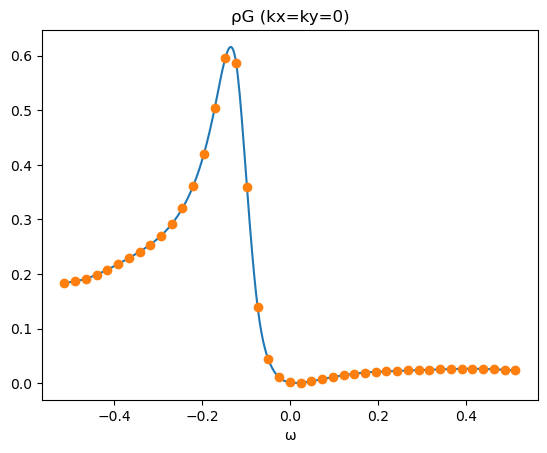

In [62]:
# spectral function data for the first (kx, ky) value (0, 0) in the n=0.710 data
# data is displayed with an interpolation

# first index in RHOG710Bi is temperature, inside that is a list of 92x92 sequential 43 point spectral functions
# The first of these, at kx=0 and ky=0, is shown below
# To find the kx and ky value for a point in RHOG710Bi you can check the same index in k1flat, k2flat

spl=interpolate.InterpolatedUnivariateSpline(omeganew[0],RHOG710Bi[0][0:43])
omega=np.linspace(omeganew[0][0],omeganew[0][-1],500)
plt.plot(omega,spl(omega))
plt.plot(omeganew[0],RHOG710Bi[0][0:43],'o')
plt.title("ρG (kx=ky=0)")
plt.xlabel("ω")
plt.show()

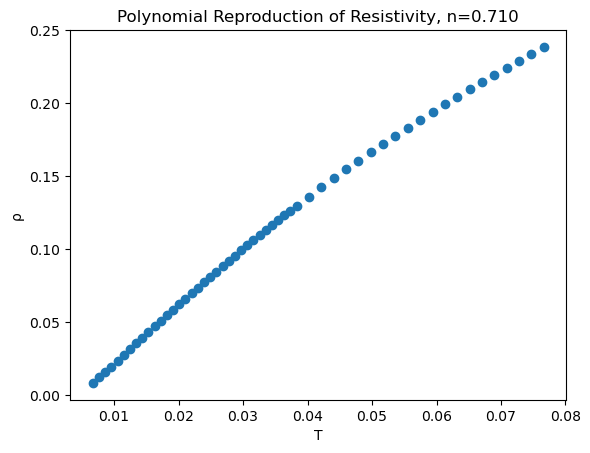

In [63]:
# one of the resistivity plots
# this is in dimensionless units, units we used can be found in the paper

plt.plot(temparray,rhoxx710Bi,'o')
plt.title("Polynomial Reproduction of Resistivity, n=0.710")
plt.ylabel("ρ")
plt.xlabel("T")
plt.show()

INTERPOLATION

In [98]:
# an easy way to estimate resistivities at new densities from our results:

rhoarr=[rhoxx680Bi,rhoxx710Bi,rhoxx740Bi,rhoxx770Bi,rhoxx800Bi,rhoxx830Bi,rhoxx860Bi]
rhoarr=[rho.tolist() for rho in rhoarr]
densities=[0.680,0.710,0.740,0.770,0.800,0.830,0.860];

tvals=np.tile(temparray,len(densities))
nvals=np.repeat(densities,len(temparray))
rhovals=flatten(rhoarr)

X = np.linspace(min(tvals), max(tvals))
Y = np.linspace(min(nvals), max(nvals))
X, Y = np.meshgrid(X,Y)
interp = interpolate.LinearNDInterpolator(list(zip(tvals, nvals)), rhovals)
Z = interp(X, Y)

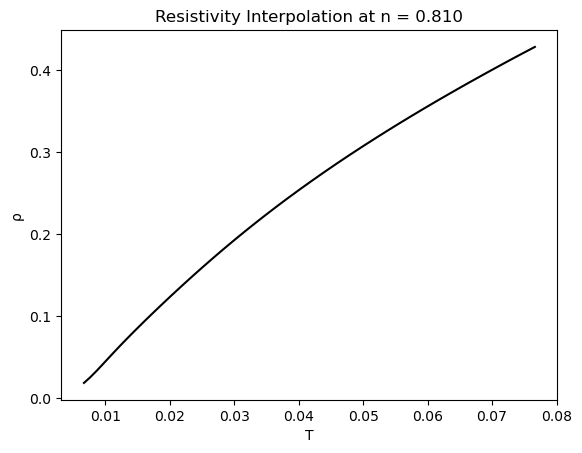

In [100]:
# demonstrating interpolation:

density=0.81

plt.plot(temparray,interp(temparray,density),'k-')
plt.title("Resistivity Interpolation at n = %1.3f" % density)
plt.ylabel("ρ")
plt.xlabel("T")
plt.show()